<h1>Model Without Using Training DataSet</h1>


<h3>Installing all the required packages</h3>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nltk
!pip install sklearn
!pip install seaborn

Importing basic required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the TASK file and adding the heading

In [36]:
data_set_train = pd.read_csv('twitter_training.csv', on_bad_lines='skip',names=['ID','something','sentiment','tweet'])
data_set_TASK = pd.read_csv('TASK1_Tweets.csv', on_bad_lines='skip',names=['TWEETS'])

Changing Train Data outputs to scores

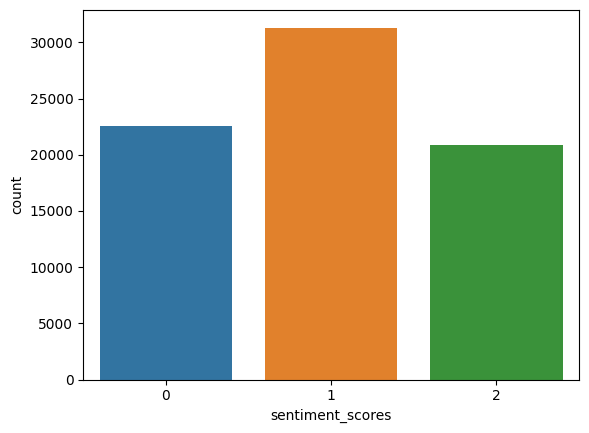

In [8]:

def change_to_sentiment_score(sentiment):
    if (sentiment=='Positive'):
        return 2
    elif (sentiment=='Negative' or sentiment=='Irrelevent'):
        return 0
    else:
        return 1
sns.countplot(x=data_set_train['sentiment_scores'])
data_set_train['sentiment_scores'] = data_set_train['sentiment'].apply(change_to_sentiment_score)


In [9]:
data_set_train.head(10)

,ID,something,sentiment,tweet,sentiment_scores
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,2
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,2
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,2
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,2
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,2
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,2
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,2
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,2
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,2
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,2


<h4>Cleaning the data set</h4>

In [16]:
# Importing the libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#downloading nltk pre-sets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
ps = PorterStemmer()

def clean(text):
    tweet = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', text)
    tweet = re.sub("(@[A-Za-z0-9_]+)","", text)
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = word_tokenize(text)
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    text = [ps.stem(word) for word in text if not word in set(all_stopwords) and len(word)>3]
    text = pos_tag(text)
    #text = [wordnet_lemmatizer.lemmatize(word,pos_dict.get(tag[0])) for word,tag in text ]
    return text

data_set_train['Cleaned_TWEETS'] = data_set_train['tweet'].apply(clean)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PorallaPradhyumna\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PorallaPradhyumna\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PorallaPradhyumna\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PorallaPradhyumna\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PorallaPradhyumna\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
data_set_train.head(10)

,ID,something,sentiment,tweet,sentiment_scores,Cleaned_TWEETS
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,2,"[(get, NN), (borderland, NN), (murder, NN)]"
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,2,"[(come, VBN), (border, NN), (kill, NN)]"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,2,"[(get, VB), (borderland, NN), (kill, NN)]"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,2,"[(come, VBN), (borderland, NN), (murder, NN)]"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,2,"[(get, NN), (borderland, NN), (murder, NN)]"
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,2,"[(get, NN), (borderland, NN), (murder, NN)]"
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,2,"[(spent, JJ), (hour, NN), (make, VBP), (someth..."
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,2,"[(spent, NN), (coupl, VBZ), (hour, NN), (somet..."
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,2,"[(spent, JJ), (hour, NN), (someth, NNS), (know..."
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,2,"[(spent, JJ), (hour, NN), (make, VBP), (someth..."


<h3>Lemmatizing the Data</h3>

In [18]:
wordnet_lemmatizer = WordNetLemmatizer()

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def wordnet_lemmatizer_clean(text):
    lemma = []
    for word,tag in text:
        tag = pos_dict.get(tag[0])
        if word.lower() not in stopwords.words('english'):
            if not tag:
                lemma.append(word)
            else:
                lemma.append(wordnet_lemmatizer.lemmatize(word,tag))

    return ' '.join(lemma)

data_set_train['Lemmatized_TWEETS'] =  data_set_train['Cleaned_TWEETS'].apply(wordnet_lemmatizer_clean)

In [19]:
data_set_train.head(10)

,ID,something,sentiment,tweet,sentiment_scores,Cleaned_TWEETS,Lemmatized_TWEETS
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,2,"[(get, NN), (borderland, NN), (murder, NN)]",get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,2,"[(come, VBN), (border, NN), (kill, NN)]",come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,2,"[(get, VB), (borderland, NN), (kill, NN)]",get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,2,"[(come, VBN), (borderland, NN), (murder, NN)]",come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,2,"[(get, NN), (borderland, NN), (murder, NN)]",get borderland murder
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,2,"[(get, NN), (borderland, NN), (murder, NN)]",get borderland murder
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,2,"[(spent, JJ), (hour, NN), (make, VBP), (someth...",spent hour make someth know huge borderland ma...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,2,"[(spent, NN), (coupl, VBZ), (hour, NN), (somet...",spent coupl hour someth know huge borderland m...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,2,"[(spent, JJ), (hour, NN), (someth, NNS), (know...",spent hour someth know huge borderland maya fa...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,2,"[(spent, JJ), (hour, NN), (make, VBP), (someth...",spent hour make someth know huge rhandlerr may...


<h3>Creating the Bag of Words model</h3>

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data_set_train['Lemmatized_TWEETS']).toarray()
Y= data_set_train['sentiment_scores']

Spliting into Train and Test data of Training dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

<h3>Training the Naive Bayes model on the Training set</h3>

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

<h4>Predicting the Test set results of training data set</h4>

In [33]:
y_pred = classifier.predict(X_test)


Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2125  368 1976]
 [1027 1856 3369]
 [ 364  324 3528]]


0.5027113878288813

<H1>Starting to predict the sentiment with the model for the TASK Data set</H1>

In [37]:
data_set_TASK.head(10)

,TWEETS
0,\xf0\x9f\x98\x91\xf0\x9f\x98\x91\xf0\x9f\x98\x...
1,Jasmine Strange shares a message of hope durin...
2,I gotta fight these allergies in public to mak...
3,https://t.co/57NBQ2XQsG On Easter please reme...
4,@lenibriscoe I have a cute one made from recyc...
5,Told my Mom we should start to work from home ...
6,\xf0\x9f\x92\x94\xf0\x9f\x92\x94\xf0\x9f\x92\x...
7,We are all in deep doo doo \xf0\x9f\x8d\xb8
8,QUE ALGUIEN EXPLIQUE \xf0\x9f\x93\xa2\xf0\x9f\...
9,This will I fear continue as it seemed like it...


Clean the Dataset

In [40]:
data_set_TASK['Cleaned_TWEETS'] = data_set_TASK['TWEETS'].apply(clean)
data_set_TASK.head(10)

,TWEETS,Cleaned_TWEETS
0,\xf0\x9f\x98\x91\xf0\x9f\x98\x91\xf0\x9f\x98\x...,"[(suck, VBN), (social, JJ), (distanc, NN)]"
1,Jasmine Strange shares a message of hope durin...,"[(jasmin, NN), (strang, NN), (share, NN), (mes..."
2,I gotta fight these allergies in public to mak...,"[(fight, NN), (allergi, VBZ), (public, JJ), (m..."
3,https://t.co/57NBQ2XQsG On Easter please reme...,"[(http, NN), (xqsg, NNP), (easter, NN), (pleas..."
4,@lenibriscoe I have a cute one made from recyc...,"[(lenibrisco, NN), (cute, NN), (made, VBD), (r..."
5,Told my Mom we should start to work from home ...,"[(told, JJ), (start, NN), (work, NN), (home, N..."
6,\xf0\x9f\x92\x94\xf0\x9f\x92\x94\xf0\x9f\x92\x...,[]
7,We are all in deep doo doo \xf0\x9f\x8d\xb8,"[(deep, NN)]"
8,QUE ALGUIEN EXPLIQUE \xf0\x9f\x93\xa2\xf0\x9f\...,"[(alguien, NN), (expliqu, NN)]"
9,This will I fear continue as it seemed like it...,"[(thi, NNS), (fear, VBP), (continu, JJ), (seem..."


Lemmatize the dataset

In [42]:
data_set_TASK['Lemmatized_TWEETS'] =  data_set_TASK['Cleaned_TWEETS'].apply(wordnet_lemmatizer_clean)
data_set_TASK.head(10)

,TWEETS,Cleaned_TWEETS,Lemmatized_TWEETS
0,\xf0\x9f\x98\x91\xf0\x9f\x98\x91\xf0\x9f\x98\x...,"[(suck, VBN), (social, JJ), (distanc, NN)]",suck social distanc
1,Jasmine Strange shares a message of hope durin...,"[(jasmin, NN), (strang, NN), (share, NN), (mes...",jasmin strang share messag hope life covid mus...
2,I gotta fight these allergies in public to mak...,"[(fight, NN), (allergi, VBZ), (public, JJ), (m...",fight allergi public make sure peopl think corona
3,https://t.co/57NBQ2XQsG On Easter please reme...,"[(http, NN), (xqsg, NNP), (easter, NN), (pleas...",http xqsg easter plea rememb poor desol covid ...
4,@lenibriscoe I have a cute one made from recyc...,"[(lenibrisco, NN), (cute, NN), (made, VBD), (r...",lenibrisco cute make recycl sari silk friend n...
5,Told my Mom we should start to work from home ...,"[(told, JJ), (start, NN), (work, NN), (home, N...",told start work home corona el work offic know...
6,\xf0\x9f\x92\x94\xf0\x9f\x92\x94\xf0\x9f\x92\x...,[],
7,We are all in deep doo doo \xf0\x9f\x8d\xb8,"[(deep, NN)]",deep
8,QUE ALGUIEN EXPLIQUE \xf0\x9f\x93\xa2\xf0\x9f\...,"[(alguien, NN), (expliqu, NN)]",alguien expliqu
9,This will I fear continue as it seemed like it...,"[(thi, NNS), (fear, VBP), (continu, JJ), (seem...",thi fear continu seem like season last winter ...


<h3>Creating the Bag of Words model</h3>

In [43]:
X_TASK = cv.fit_transform(data_set_TASK['Lemmatized_TWEETS']).toarray()

<H2>Prediction for the TASK data set using NavieBayes </H2>

In [45]:
data_set_TASK['Predictions of TASK'] = classifier.predict(X_TASK)
data_set_TASK.head(10)

,TWEETS,Cleaned_TWEETS,Lemmatized_TWEETS,Predictions of TASK
0,\xf0\x9f\x98\x91\xf0\x9f\x98\x91\xf0\x9f\x98\x...,"[(suck, VBN), (social, JJ), (distanc, NN)]",suck social distanc,2
1,Jasmine Strange shares a message of hope durin...,"[(jasmin, NN), (strang, NN), (share, NN), (mes...",jasmin strang share messag hope life covid mus...,1
2,I gotta fight these allergies in public to mak...,"[(fight, NN), (allergi, VBZ), (public, JJ), (m...",fight allergi public make sure peopl think corona,0
3,https://t.co/57NBQ2XQsG On Easter please reme...,"[(http, NN), (xqsg, NNP), (easter, NN), (pleas...",http xqsg easter plea rememb poor desol covid ...,0
4,@lenibriscoe I have a cute one made from recyc...,"[(lenibrisco, NN), (cute, NN), (made, VBD), (r...",lenibrisco cute make recycl sari silk friend n...,0
5,Told my Mom we should start to work from home ...,"[(told, JJ), (start, NN), (work, NN), (home, N...",told start work home corona el work offic know...,1
6,\xf0\x9f\x92\x94\xf0\x9f\x92\x94\xf0\x9f\x92\x...,[],,2
7,We are all in deep doo doo \xf0\x9f\x8d\xb8,"[(deep, NN)]",deep,2
8,QUE ALGUIEN EXPLIQUE \xf0\x9f\x93\xa2\xf0\x9f\...,"[(alguien, NN), (expliqu, NN)]",alguien expliqu,2
9,This will I fear continue as it seemed like it...,"[(thi, NNS), (fear, VBP), (continu, JJ), (seem...",thi fear continu seem like season last winter ...,0


<h1>Saving The Final Preditcion File in "Analysed_DataSet.csv"</h1>

In [46]:
data_set_TASK.to_csv("Analysed_DataSet.csv")